In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import seaborn as sns

In [2]:
data = load_iris()
X = data.data
y = data.target

print("Dataset shape:", X.shape)
print("Target classes:", data.target_names)
print("\nTarget distribution:")
print(pd.Series(y).value_counts().sort_index())

Dataset shape: (150, 4)
Target classes: ['setosa' 'versicolor' 'virginica']

Target distribution:
0    50
1    50
2    50
Name: count, dtype: int64


In [3]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results[name] = scores
    print(f"{name}:")
    print(f"  CV Scores: {scores}")
    print(f"  Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")
    print()

Logistic Regression:
  CV Scores: [1.         1.         0.93333333 0.96666667 0.96666667]
  Mean: 0.9733, Std: 0.0249

Decision Tree:
  CV Scores: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
  Mean: 0.9533, Std: 0.0267

Random Forest:
  CV Scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
  Mean: 0.9600, Std: 0.0249



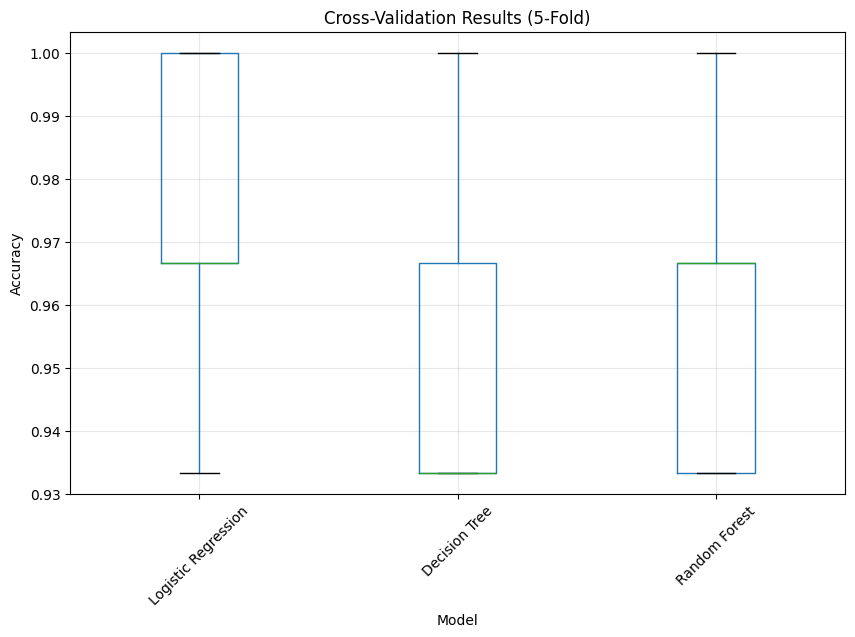

In [4]:
plt.figure(figsize=(10, 6))
df_results = pd.DataFrame(results)
df_results.boxplot()
plt.title('Cross-Validation Results (5-Fold)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

In [5]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("--- Stratified K-Fold (preserves class distribution) ---\n")

results_stratified = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=skfold, scoring='accuracy')
    results_stratified[name] = scores
    print(f"{name}:")
    print(f"  Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")
    print()

--- Stratified K-Fold (preserves class distribution) ---

Logistic Regression:
  Mean: 0.9667, Std: 0.0298

Decision Tree:
  Mean: 0.9533, Std: 0.0340

Random Forest:
  Mean: 0.9467, Std: 0.0267



In [6]:
kfold_10 = KFold(n_splits=10, shuffle=True, random_state=42)

print("--- 10-Fold Cross-Validation ---\n")

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kfold_10, scoring='accuracy')
    print(f"{name}:")
    print(f"  Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")
    print()

--- 10-Fold Cross-Validation ---

Logistic Regression:
  Mean: 0.9733, Std: 0.0442

Decision Tree:
  Mean: 0.9400, Std: 0.0554

Random Forest:
  Mean: 0.9600, Std: 0.0533

